In [81]:
from IPython.display import Image, display, HTML, Video, IFrame
import ipyplot
import matplotlib.pyplot as plt
import os
import os.path as osp
# https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook
# https://stackoverflow.com/questions/19471814/display-multiple-images-in-one-ipython-notebook-cell
# https://stackoverflow.com/questions/51975699/embedding-image-into-jupyter-notebook-and-exporting-to-html
# https://reproducible-science-curriculum.github.io/publication-RR-Jupyter/02-exporting_the_notebook/index.html

In [46]:
# 20210126_110356_CIFAR_attention_transformer  20210126_160343_MNIST_constant_laplacian   20210126_165530_MNIST_attention_transformer  20210126_170924_CIFAR_attention_laplacian
# 20210126_145653_CIFAR_attention_transformer  20210126_160959_MNIST_attention_laplacian  20210126_170155_CIFAR_constant_laplacian
model_key = '20210126_145653' 
directory = f"../models/"
for filename in os.listdir(directory):
#     print(filename)
    if filename.startswith(model_key):
      path = osp.join(directory, filename)
      print(path)
      break
[_, _, data_name, blck, fct] = path.split("_")
modelfolder = f"{directory}{model_key}_{data_name}_{blck}_{fct}"
modelpath = f"{modelfolder}/model_{model_key}"

../models/20210126_145653_CIFAR_attention_transformer


In [47]:
image_file = f"{modelpath}_imageT.pdf"
# Image(filename=image_file)
IFrame(image_file, width=600, height=500)

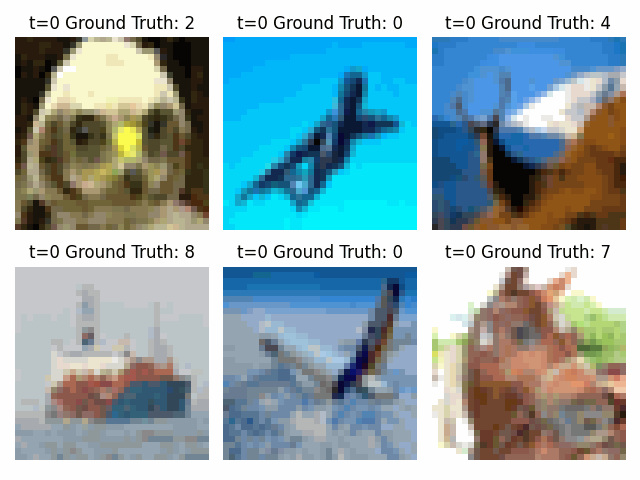

In [48]:
image_file = f"{modelpath}_animation.gif"
Image(filename=image_file)#,width=600, height=500) 

In [49]:
images_0 = []
images_T = []
animations = []
maxmin = []
labels = []
directory = f"../models/"
for model in os.listdir(directory):
    if model.startswith("2021"):
        path = os.path.join(directory, model)
        [date, time, data_name, blck, fct] = path.split("_")
        model_key = f"{date}_{time}"        
        for i in range(10):
            labels.append(f"{data_name}_{blck}_{fct}")
            images_0.append(f"{path}/image_0/image_0_{i}.png")
            images_T.append(f"{path}/image_10/image_10_{i}.png")
            animations.append(f"{path}/animations/animation{i}.gif")
            maxmin.append(f"{path}/maxmin/max_min_{i}.png")            

In [50]:
# %%HTML
# ("""
# <video width="320" height="240" controls>
#     <source src="models/20210125_115601_CIFAR_attention_laplacian/model_20210125_115601_animation3.mp4" type="video/mp4">
# </video>    
# """)

In [51]:
ipyplot.plot_class_tabs(images_0, labels, max_imgs_per_tab=10, img_width=150)

In [52]:
ipyplot.plot_class_tabs(images_T, labels, img_width=150)

In [53]:
ipyplot.plot_class_tabs(animations, labels, img_width=150)

In [54]:
ipyplot.plot_class_tabs(maxmin, labels, img_width=150)

In [237]:
images_0 = []
images_5 = []
images_10 = []
labels = []
directory = f"../models/"
for model in os.listdir(directory):
    if model.startswith("20210126_14") or model.startswith("20210126_16") or model.startswith("20210126_17"):
        path = os.path.join(directory, model)
        [date, time, data_name, blck, fct] = path.split("_")
        model_key = f"{date}_{time}"        
        for i in range(1):
            labels.append(f"{data_name}_{blck}_{fct}")
            images_0.append(f"{path}/image_0/image_0_{i}.png")
            images_5.append(f"{path}/image_5/image_5_{i}.png")
            images_10.append(f"{path}/image_10/image_10_{i}.png")

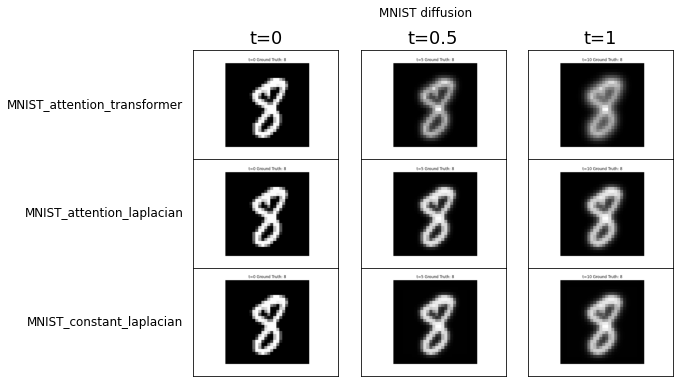

In [246]:
images = [images_0, images_5, images_10]
rows = labels[0:4]
fig, axs = plt.subplots(3,3, figsize=(9, 6), sharex=True, sharey=True)
fig.suptitle('MNIST diffusion')
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(plt.imread(images[j][i]))
        axs[i,j].set_yticks([])
        axs[i,j].set_xticks([])
plt.subplots_adjust(wspace=0, hspace=0)
for ax, t in zip(axs[0], ['t=0','t=0.5','t=1']):
    ax.set_title(t, size=18)
pad = 2
for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
plt.savefig("../models/MNISTdiff.pdf",format="pdf")

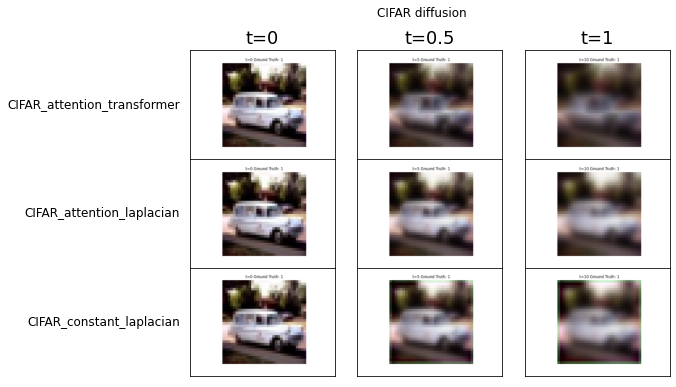

In [245]:
images = [images_0, images_5, images_10]
rows = labels[3:]
fig, axs = plt.subplots(3,3, figsize=(9, 6), sharex=True, sharey=True)
fig.suptitle('CIFAR diffusion')
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(plt.imread(images[j][i+3]))
        axs[i,j].set_yticks([])
        axs[i,j].set_xticks([])
plt.subplots_adjust(wspace=0, hspace=0)
for ax, t in zip(axs[0], ['t=0','t=0.5','t=1']):
    ax.set_title(t, size=18)
pad = 2
for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
plt.savefig("../models/CIFARdiff.pdf",format="pdf")